In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


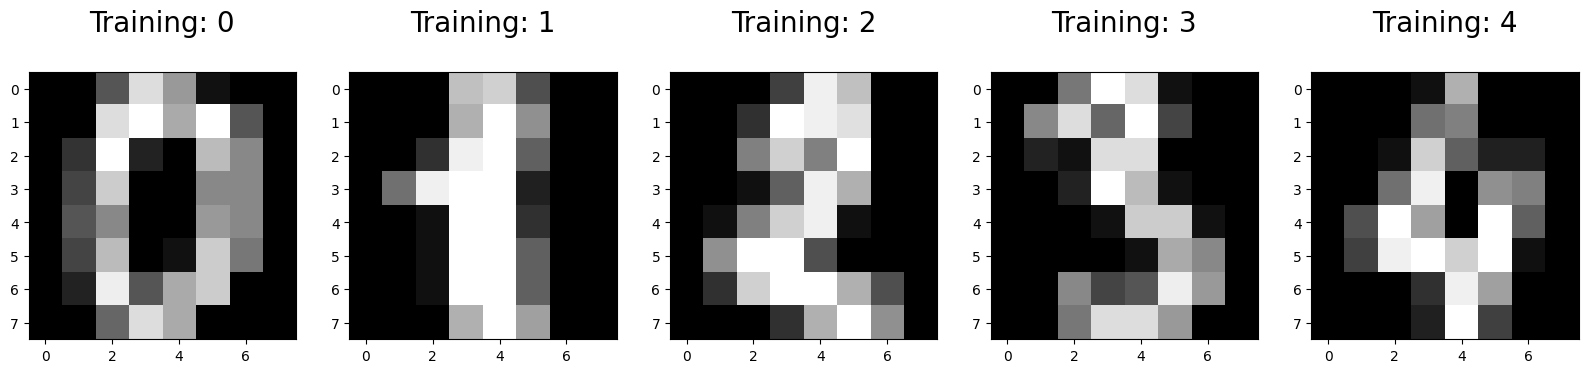

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()


In [ ]:
import sys

sys.path.append('../')
from mlflow_emissions_sdk.experiment_tracking_training import EmissionsTrackerMlflow

tracker_info = {
    "tracking_uri" : "azureml://westeurope.api.azureml.ms/mlflow/v1.0/subscriptions/67aa4f5f-c6df-439c-a58c-4bd5820f967c/resourceGroups/rg-rootsacademy-tracksense/providers/Microsoft.MachineLearningServices/workspaces/ml-rootsacademy-tracksense",
    "experiment_name" : "sklearn_exp_azure",
    "run_name" : "LogisticRegression",
    "flavor" : 'sklearn'
}

runner = EmissionsTrackerMlflow()
runner.read_params(tracker_info)
runner.start_training_job()

logisticRegr.fit(x_train, y_train)

runner.end_training_job()
runner.accuracy_per_emission(logisticRegr, x_test, y_test)


[codecarbon INFO @ 14:31:52] [setup] RAM Tracking...
[codecarbon INFO @ 14:31:52] [setup] GPU Tracking...
[codecarbon INFO @ 14:31:52] No GPU found.
[codecarbon INFO @ 14:31:52] [setup] CPU Tracking...
[codecarbon WARNING @ 14:31:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:31:52] We saw that you have a Apple M2 Pro but we don't know it. Please contact us.
[codecarbon INFO @ 14:31:52] CPU Model on constant consumption mode: Apple M2 Pro
[codecarbon INFO @ 14:31:52] >>> Tracker's metadata:
[codecarbon INFO @ 14:31:52]   Platform system: macOS-14.0-arm64-arm-64bit
[codecarbon INFO @ 14:31:52]   Python version: 3.11.6
[codecarbon INFO @ 14:31:52]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 14:31:52]   Available RAM : 16.000 GB
[codecarbon INFO @ 14:31:52]   CPU count: 10
[codecarbon INFO @ 14:31:52]   CPU model: Apple M2 Pro
[codecarbon INFO @ 14:31:52]   GPU count: None
[codecarbon INFO @ 14:31:52]   GPU model: None
2023/10/27 14:31:55 IN

Please refer to a running instance of mlflow ui


/Users/alial-gburi/rootsacademy/acad-proj/datar-mlflow-emissions/mlflow-emissions-sdk/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


UnsupportedModelRegistryStoreURIException:  Model registry functionality is unavailable; got unsupported URI 'azureml://westeurope.api.azureml.ms/mlflow/v1.0/subscriptions/67aa4f5f-c6df-439c-a58c-4bd5820f967c/resourceGroups/rg-rootsacademy-tracksense/providers/Microsoft.MachineLearningServices/workspaces/ml-rootsacademy-tracksense' for model registry data storage. Supported URI schemes are: ['', 'file', 'databricks', 'databricks-uc', 'http', 'https', 'postgresql', 'mysql', 'sqlite', 'mssql']. See https://www.mlflow.org/docs/latest/tracking.html#storage for how to run an MLflow server against one of the supported backend storage locations.

[codecarbon INFO @ 14:32:10] Energy consumed for RAM : 0.000025 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 14:32:10] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:32:10] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:25] Energy consumed for RAM : 0.000050 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 14:32:25] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:32:25] 0.000404 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:40] Energy consumed for RAM : 0.000075 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 14:32:40] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:32:40] 0.000606 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:55] Energy consumed for RAM : 0.000100 kWh. RAM Power : 6.0 W
[codecarbon INFO @ 14:32:55] Energy consumed for all CPUs : 0.000709 kWh. Total CPU Power : 42.5 W
[codeca

In [ ]:
logisticRegr.predict(x_test[:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])